- This dataset contains weekly sales from 99 departments belonging to 45 different stores. 
- Our aim is to forecast weekly sales from a particular department.
- The objective of this case study is to forecast weekly retail store sales based on historical data.
- The data contains holidays and promotional markdowns offered by various stores and several departments throughout the year.
- Markdowns are crucial to promote sales especially before key events such as Super Bowl, Christmas and Thanksgiving. 
- Developing accurate model will enable make informed decisions and make recommendations to improve business processes in the future. 
- The data consists of three sheets: 
    - Stores
    - Features
    - Sales
- Data Source : https://www.kaggle.com/manjeetsingh/retaildataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile


In [4]:
# import the csv files using pandas 
feature = pd.read_csv('Features_data_set.csv')
sales = pd.read_csv('sales_data_set.csv')
stores = pd.read_csv('stores_data_set.csv')

In [4]:
# Let's explore the 3 dataframes
# "stores" dataframe contains information related to the 45 stores such as type and size of store.

stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [12]:
# Change the datatype of 'date' column

feature['Date'] = pd.to_datetime(feature['Date'])
sales['Date'] = pd.to_datetime(sales['Date'])

In [5]:
df = pd.merge(sales, feature, on = ['Store','Date','IsHoliday'])


In [8]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [ ]:
stores.head()

In [6]:
df = pd.merge(df, stores, on = ['Store'], how = 'left')


In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
df = df.rename(str.lower, axis='columns')

In [9]:
df["date"] = df["date"].astype("datetime64")

In [10]:
df["month"] = df["date"].dt.month
# df["year"] = df["date"].dt.year
# df["day"] = df["date"].dt.day

In [11]:
df.head(1).T

,0
store,1
dept,1
date,2010-05-02 00:00:00
weekly_sales,24924.5
isholiday,False
temperature,42.31
fuel_price,2.572
markdown1,NaN
markdown2,NaN
markdown3,NaN


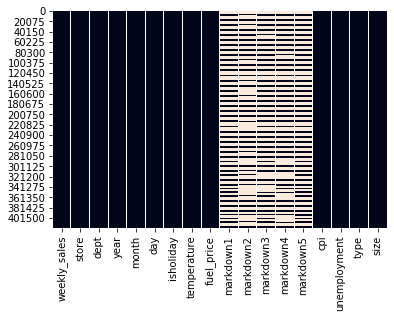

In [44]:
sns.heatmap(df.isnull(), cbar = False)

In [12]:
# Fill up NaN elements with zeros
df = df.fillna(0)


In [46]:
# check the number of non-null values in the dataframe
df.shape, df.isnull().sum()


((421570, 18),
 weekly_sales    0
 store           0
 dept            0
 year            0
 month           0
 day             0
 isholiday       0
 temperature     0
 fuel_price      0
 markdown1       0
 markdown2       0
 markdown3       0
 markdown4       0
 markdown5       0
 cpi             0
 unemployment    0
 type            0
 size            0
 dtype: int64)

In [58]:
df["size"].mean()

136727.91573878596

In [13]:
df['type'].value_counts()

A    215478
B    163495
C     42597
Name: type, dtype: int64

In [82]:
df

,weekly_sales,store,dept,year,month,day,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
0,24924.50,1,1,2010,5,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,50605.27,1,2,2010,5,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,13740.12,1,3,2010,5,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,39954.04,1,4,2010,5,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,32229.38,1,5,2010,5,2,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,2487.80,45,93,2012,10,26,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,5203.31,45,94,2012,10,26,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,56017.47,45,95,2012,10,26,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,6817.48,45,97,2012,10,26,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [14]:
df = pd.get_dummies(df,columns=["type","store","dept"], drop_first=True)


In [84]:
# Statistical summary of the combined dataframe
df.describe()

,weekly_sales,year,month,day,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,...,dept_90,dept_91,dept_92,dept_93,dept_94,dept_95,dept_96,dept_97,dept_98,dept_99
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,...,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,2010.968591,6.478580,15.644061,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,...,0.015264,0.015264,0.015264,0.014026,0.013485,0.015264,0.011514,0.014892,0.013843,0.002045
std,22711.183519,0.796876,3.324757,8.753493,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,...,0.122603,0.122603,0.122603,0.117599,0.115341,0.122603,0.106684,0.121121,0.116841,0.045173
min,-4988.940000,2010.000000,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.650000,2010.000000,4.000000,8.000000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7612.030000,2011.000000,6.000000,16.000000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20205.852500,2012.000000,9.000000,23.000000,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,693099.360000,2012.000000,12.000000,31.000000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# check the number of duplicated entries in the dataframe
df.duplicated().sum()


0

In [88]:
# list(df.columns)

In [89]:
# df['type'].value_counts()

In [15]:
df['isholiday'] = df['isholiday'].replace({False:0, True:1})

In [16]:
df['isholiday'].value_counts()

0    391909
1     29661
Name: isholiday, dtype: int64

In [56]:
# Create pivot tables to understand the relationship in the data

result = pd.pivot_table(df, values = 'weekly_sales', columns = ['type'], index = ['year',"month","day", 'store', 'dept'],
                    aggfunc= np.mean)

In [57]:
result

type                              A         B   C
year month day store dept                        
2010 1     10  1     1     20094.19       NaN NaN
                     2     45829.02       NaN NaN
                     3      9775.17       NaN NaN
                     4     34912.45       NaN NaN
                     5     23381.38       NaN NaN
...                             ...       ...  ..
2012 12    10  45    93         NaN   2644.24 NaN
                     94         NaN   4041.28 NaN
                     95         NaN  49334.77 NaN
                     97         NaN   6463.32 NaN
                     98         NaN   1061.02 NaN

[421570 rows x 3 columns]

In [69]:
result.describe()
# It can be seen that Type A stores have much higher sales than Type B and Type C

type,A,B,C
count,215478.000000,163495.000000,42597.000000
mean,20099.568043,12237.075977,9519.532538
std,26423.457227,17203.668989,15985.351612
min,-4988.940000,-3924.000000,-379.000000
25%,3315.090000,1927.055000,131.990000
50%,10105.170000,6187.870000,1149.670000
75%,26357.180000,15353.740000,12695.010000
max,474330.100000,693099.360000,112152.350000


In [ ]:
result_md.describe()
# we can conclude that MarkDown2 and MarkDown3 have higher volume on holidays compared to that of regular days 
# while other MarkDowns don't show significant changes relating to holiday.

In [75]:
corr_matrix = df.drop(columns = ['store']).corr()

In [19]:
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [17]:
# Drop the date
df_target = df['weekly_sales']
df_final = df.drop(columns = ['weekly_sales', "date"])


In [18]:
df_final.shape

(421570, 138)

In [92]:
df_target.shape

(421570,)

In [93]:
df_final

,month,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,...,dept_90,dept_91,dept_92,dept_93,dept_94,dept_95,dept_96,dept_97,dept_98,dept_99
0,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
1,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
2,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
3,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
4,5,0,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,10,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,0,0,0,1,0,0,0,0,0,0
421566,10,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,0,0,0,0,1,0,0,0,0,0
421567,10,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,0,0,0,0,0,1,0,0,0,0
421568,10,0,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,...,0,0,0,0,0,0,0,1,0,0


In [19]:
X = np.array(df_final).astype('float32')
y = np.array(df_target).astype('float32')

In [20]:
# reshaping the array from (421570,) to (421570, 1)
y = y.reshape(-1,1)
y.shape

(421570, 1)

In [21]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)


In [22]:
X_train

array([[ 0.   , 42.53 ,  3.686, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 99.22 ,  3.112, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 45.99 ,  3.225, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 34.23 ,  3.23 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 40.11 ,  3.789, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 65.99 ,  4.273, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

# TRAIN XGBOOST REGRESSOR IN LOCAL MODE

In [1]:
# !pip install xgboost
# Train an XGBoost regressor model 

import xgboost as xgb

In [23]:
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
# predict the score of the trained model using the testing dataset

result = model.score(X_test, y_test)

print("Accuracy : {}".format(result))

Accuracy : 0.8137676269197343


In [25]:
# make predictions on the test data

y_predict = model.predict(X_test)


In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 9637.037 
MSE = 92872480.0 
MAE = 6477.1396 
R2 = 0.8137676269197343 
Adjusted R2 = 0.8129512074818526


In [27]:
k,n

(138, 31618)

MINI CHALLENGE
- Retrain the model with less 'max_depth'
- Comment on the results

# TRAIN XGBOOST USING SAGEMAKER

In [28]:
# Convert the array into dataframe in a way that target variable is set as the first column and followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format.

train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [29]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,26305.740234,0.0,42.529999,3.686,2818.419922,24.030001,2.970000,343.26001,1064.560059,199.219528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9536.750000,0.0,99.220001,3.112,0.000000,0.000000,0.000000,0.00000,0.000000,126.128357,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8430.759766,1.0,45.990002,3.225,32.500000,317.079987,42455.511719,6.00000,1438.089966,129.836395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20514.849609,0.0,65.989998,4.282,2.120000,0.000000,34.230000,0.00000,250.619995,131.037552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2063.149902,0.0,35.340000,2.834,0.000000,0.000000,0.000000,0.00000,0.000000,131.824295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
val_data = pd.DataFrame({'Target':y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [31]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,128,129,130,131,132,133,134,135,136,137
0,23387.310547,0.0,76.669998,4.087,0.0,0.0,0.0,0.0,0.0,129.062347,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,922.280029,0.0,56.439999,3.633,0.0,0.0,0.0,0.0,0.0,140.434753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9811.629883,0.0,84.989998,3.022,0.0,0.0,0.0,0.0,0.0,126.089287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21040.359375,0.0,53.529999,3.223,0.0,0.0,0.0,0.0,0.0,127.440483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5868.250000,1.0,80.839996,2.565,0.0,0.0,0.0,0.0,0.0,214.806549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
val_data.shape

(31618, 139)

In [33]:
# save train_data and validation_data as csv files.

train_data.to_csv('train.csv', header = False, index = False)
val_data.to_csv('validation.csv', header = False, index = False)

In [2]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket() 
prefix = 'XGBoost-Regressor'
key = 'XGBoost-Regressor'
#Roles give learning and hosting access to the data
#This is specified while opening the sagemakers instance in "Create an IAM role"
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::618725421363:role/service-role/AmazonSageMaker-ExecutionRole-20211223T020495


In [40]:
boto3.Session().resource('s3').Bucket(bucket).Object(f"{prefix}/train/{key}").upload_fileobj(open('train.csv','rb'))
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-us-east-1-618725421363/XGBoost-Regressor/train/XGBoost-Regressor


In [41]:
boto3.Session().resource('s3').Bucket(bucket).Object(f"{prefix}/validation/{key}").upload_fileobj(open('validation.csv','rb'))
s3_validation_data= 's3://{}/{}/validation/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_validation_data))

uploaded validation data location: s3://sagemaker-us-east-1-618725421363/XGBoost-Regressor/train/XGBoost-Regressor


In [3]:
# creates output placeholder in S3 bucket to store the output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://sagemaker-us-east-1-618725421363/XGBoost-Regressor/output


In [4]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker import image_uris

container = image_uris.retrieve("xgboost", boto3.Session().region_name, "1")  # Latest version of XGboost

In [44]:
# Specify the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

# Recall that XGBoost works by combining an ensemble of weak models to generate accurate/robust results. 
# The weak models are randomized to avoid overfitting

# num_round: The number of rounds to run the training.


# Alpha: L1 regularization term on weights. Increasing this value makes models more conservative.

# colsample_by_tree: fraction of features that will be used to train each tree.

# eta: Step size shrinkage used in updates to prevent overfitting. 
# After each boosting step, eta parameter shrinks the feature weights to make the boosting process more conservative.


Xgboost_regressor1 = sagemaker.estimator.Estimator(container,
                                       role, 
                                        instance_count = 1, 
                                        instance_type = 'ml.m5.2xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)

#We can tune the hyper-parameters to improve the performance of the model

Xgboost_regressor1.set_hyperparameters(max_depth = 10,
                           objective = 'reg:linear',
                           colsample_bytree = 0.3,
                           alpha = 10,
                           eta = 0.1,
                           num_round = 100
                           )



In [20]:
# Creating "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html

# train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
# valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')

train_input = sagemaker.inputs.TrainingInput(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.inputs.TrainingInput(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')



data_channels = {'train': train_input,'validation': valid_input}


Xgboost_regressor1.fit(data_channels)

# DEPLOY THE MODEL TO MAKE PREDICTIONS

In [97]:
# Deploy the model to perform inference 

Xgboost_regressor = Xgboost_regressor1.deploy(initial_instance_count = 1, instance_type = 'ml.m5.2xlarge')

-----!

In [98]:
'''
Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data
in text/csv format, we specify this as content -type.

Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content
type

Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
'''
from sagemaker.predictor import csv_serializer, json_deserializer


Xgboost_regressor.serializer = csv_serializer


In [99]:
X_test

array([[ 0.   , 70.87 ,  3.918, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 72.99 ,  3.807, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 51.78 ,  3.569, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 62.59 ,  2.72 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 77.64 ,  2.854, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 41.59 ,  3.389, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

In [100]:
# making prediction

predictions1 = Xgboost_regressor.predict(X_test[0:10000])

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [101]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [102]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [103]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [66]:
len(str(predictions4)[2:-1].split(","))

1618

In [104]:
res=np.array([])
for i in [predictions1,predictions2,predictions3,predictions4]:
    i= str(i)[2:-1].split(",")
    res= np.concatenate([res,np.array(i)])
len(res)
    

31618

In [105]:
res = res.reshape(-1,1)

In [87]:
res.shape

(31618, 1)

In [76]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    # makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    # Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    # iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    # converting the list into array
    l = np.array(l).astype('float32')
    
    # reshape one-dimensional array to two-dimensional array
    return l.reshape(-1,1)
    

In [77]:
predicted_values_1 = bytes_2_array(predictions1)

In [78]:
predicted_values_1.shape

(10000, 1)

In [79]:
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

(10000, 1)

In [80]:
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

(10000, 1)

In [81]:
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

(1618, 1)

In [82]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [91]:
predicted_values

array([['5848.51513671875'],
       ['9895.755859375'],
       ['7687.02734375'],
       ...,
       ['19473.53125'],
       ['10379.6845703125'],
       ['13965.66796875']], dtype='<U32')

In [106]:
predicted_values = res.astype('float32')

In [107]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 7297.302 
MSE = 53250612.0 
MAE = 4417.1567 
R2 = 0.8932192995936153 
Adjusted R2 = 0.8927511863544374


In [108]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# PERFORM HYPERPARAMETERS OPTIMIZATION

See Slides for detailed steps

# TRAIN THE MODEL WITH BEST PARAMETERS

In [ ]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training

Xgboost_regressor = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune the hyper-parameters to improve the performance of the model
Xgboost_regressor.set_hyperparameters(max_depth=25,
                           objective='reg:linear',
                           colsample_bytree = 0.3913546819101119,
                           alpha = 1.0994354985124635,
                           eta = 0.23848185159806115,
                           num_round = 237
                           )


In [ ]:
train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_validation_data, content_type='csv',s3_data_type = 'S3Prefix')
data_channels = {'train': train_input,'validation': valid_input}
Xgboost_regressor.fit(data_channels)

In [ ]:
# Deploying the model to perform inference

Xgboost_regressor = Xgboost_regressor.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

In [ ]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Xgboost_regressor.content_type = 'text/csv'
Xgboost_regressor.serializer = csv_serializer


In [ ]:
# Try to make inference with the entire testing dataset (Crashes!)
predictions = Xgboost_regressor.predict(X_test)
predicted_values = bytes_2_array(predictions)

In [ ]:
predictions1 = Xgboost_regressor.predict(X_test[0:10000])

In [ ]:
predicted_values_1 = bytes_2_array(predictions1)
predicted_values_1.shape

In [ ]:
predictions2 = Xgboost_regressor.predict(X_test[10000:20000])
predicted_values_2 = bytes_2_array(predictions2)
predicted_values_2.shape

In [ ]:
predictions3 = Xgboost_regressor.predict(X_test[20000:30000])
predicted_values_3 = bytes_2_array(predictions3)
predicted_values_3.shape

In [ ]:
predictions4 = Xgboost_regressor.predict(X_test[30000:31618])
predicted_values_4 = bytes_2_array(predictions4)
predicted_values_4.shape

In [ ]:
predicted_values = np.concatenate((predicted_values_1, predicted_values_2, predicted_values_3, predicted_values_4))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, predicted_values)),'.3f'))
MSE = mean_squared_error(y_test, predicted_values)
MAE = mean_absolute_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

In [ ]:
# Delete the end-point

Xgboost_regressor.delete_endpoint()

# EXCELLENT JOB! 